## Sleep Health and Lifestyle

### Introduction
A sleep disorder is a medical condition that affects an individual's ability to have a healthy and restorative night's sleep. Sleep is an essential part of our daily routine, and disturbances in this natural process can have profound impacts on physical, mental, and emotional well-being. There are various types of sleep disorders, each characterized by distinct symptoms and underlying causes.

Common sleep disorders include insomnia, sleep apnea, narcolepsy,and parasomnias like sleepwalking or night terrors. These conditions can result in difficulty falling asleep, staying asleep, or experiencing refreshing sleep. As a result, individuals with sleep disorders often experience daytime fatigue, mood disturbances, and cognitive impairments.

Sleep disorders can be caused by a wide range of factors, including lifestyle, stress, underlying medical conditions, and genetic predispositions. They are diagnosed through clinical evaluations, sleep studies, and assessments of sleep patterns and behaviors. Treatment options vary depending on the specific disorder and may include lifestyle modifications, medications, or therapies aimed at improving sleep quality.

Understanding and addressing sleep disorders are crucial for overall health and quality of life, as untreated conditions can lead to severe health consequences. Machine learning and artificial intelligence(AI) algorithms are also used to predict which patterns are at the hishest risk of sleep disorder and enable healthcare providers to intervene proactively to prevent sleep disorder.

### Data and Methods
This synthetic dataset contains sleep and cardiovascular metrics as well as lifestyle factors of close to 400 fictive persons.

The workspace is set up with one CSV file, data.csv, with the following columns:

Person ID
Gender
Age
Occupation
Sleep Duration: Average number of hours of sleep per day
Quality of Sleep: A subjective rating on a 1-10 scale
Physical Activity Level: Average number of minutes the person engages in physical activity daily
Stress Level: A subjective rating on a 1-10 scale
BMI Category
Blood Pressure: Indicated as systolic pressure over diastolic pressure
Heart Rate: In beats per minute
Daily Steps
Sleep Disorder: One of None, Insomnia or Sleep Apnea
Remarks on the data: The dataframe contains 374 rows and 13 columns, with no missing values or duplicate rows.Most of the numeric columns exhibit skewness,likely due to a significant number of outlier which totalled 15 .To prevent the loss of important information during analysis we retained these outliers.

Methods The exploratory data analysis involved various methodologies, including data cleaning, data visualization, statistical analysis, and machine learning algorithms. To clean the data, I used pandas to handle missing values and ouliers, and transform variables as necessary.I also used pd.getdummies, to prepare the data for machine learning algorithms.For visualization, I employed Matplotlib and seaborn to create various plots,including barplots, lineplots, scatterplots and heatmaps, to identify patterns and understand relationship between variables. For machine learning, I implemented varoius algorithms, such as K-Nearest Neighbors, Logistic Regression, DecisionTreeClassifiers, Linear Support Vector Machine, Multilayer perception and evaluated the model based on accuracy ,F1 score ,recall and precision.

### Target variable

**A. Sleep Apnea:**
Sleep apnea is a sleep disorder characterized by pauses in breathing or instances of shallow or infrequent breathing during sleep. These interruptions in breathing can last for a few seconds to minutes and may occur multiple times per hour. There are three main types of sleep apnea:

1. **Obstructive Sleep Apnea (OSA):**
   - The most common form, OSA occurs when the muscles in the throat relax excessively during sleep, causing a blockage in the airway.

2. **Central Sleep Apnea (CSA):**
   - CSA is less common and involves a failure of the brain to transmit the appropriate signals to the muscles that control breathing.

3. **Complex Sleep Apnea Syndrome (Treatment-Emergent Central Sleep Apnea):**
   - Also known as treatment-emergent central sleep apnea, this type occurs when someone with OSA develops CSA after starting continuous positive airway pressure (CPAP) therapy.

**Common Symptoms of Sleep Apnea:**
- Loud snoring.
- Episodes of breathing cessation followed by a sudden gasp or snort.
- Restless sleep.
- Excessive daytime sleepiness.

**Treatment Options:**
- Lifestyle changes (weight loss, positional therapy).
- Continuous positive airway pressure (CPAP) therapy.
- Oral appliances.
- Surgery (in severe cases).

**B. Insomnia:**
Insomnia is a sleep disorder characterized by difficulty falling asleep, staying asleep, or both, despite having the opportunity for adequate sleep. It can be a chronic condition or a transient issue caused by stress, changes in environment, or other factors.

**Common Types of Insomnia:**
1. **Transient Insomnia:**
   - Lasts for a few nights and is often linked to a specific event or circumstance.

2. **Acute Insomnia:**
   - Brief episodes of difficulty sleeping, typically lasting for less than a month.

3. **Chronic Insomnia:**
   - Ongoing difficulty sleeping that occurs at least three nights per week for three months or longer.

**Common Causes of Insomnia:**
- Stress and anxiety.
- Poor sleep habits.
- Changes in environment or work schedule.

**Common Symptoms of Insomnia:**
- Difficulty falling asleep.
- Waking up during the night and having trouble returning to sleep.
- Feeling tired upon waking.

**C. No Disorder:**
This category represent the group of persons with neither of the above sleep disorder conditions

####  Installing and importing libraries

In [1]:
import pandas as pd 
import mysql.connector as sql
import datasist as ds
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### creating sql connection and connecting to database

In [2]:
conn = sql.connect(host= 'localhost' , 
                   user='root',
                   passwd='root',
                   use_pure=True,
                  database='sleepdt')
print(conn)

#### Read in file as dataframe

In [3]:
#read dataset as pandas dataframe
data = pd.read_sql_query('''SELECT * FROM sleepdt.sleep_data''', conn)

sleep_df = pd.DataFrame(data)
sleep_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_5328\2680269667.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query('''SELECT * FROM sleepdt.sleep_data''', conn)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


#### DATA CLEANING

In [4]:
#checking for missing values

sleep_df.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [5]:
#cleaning data columns

sleep_df['Sleep Disorder'] = sleep_df['Sleep Disorder'].replace({'None':'No disorder'})

sleep_df[['Systolic', 'Diastolic']] = sleep_df['Blood Pressure'].str.split('/', expand=True)
sleep_df[['Systolic', 'Diastolic']] = sleep_df[['Systolic', 'Diastolic']].astype('int64','int64')
sleep_df[['Systolic', 'Diastolic']].dtypes

sleep_df['BMI Category']  = sleep_df['BMI Category'].str.replace("Normal Weight", 'Normal')
sleep_df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

#### Exploratory Data Analysis using Datasist Library

In [6]:
#brief data analysis
ds.structdata.describe(sleep_df)

First five data points


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No disorder,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90




Random five data points


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
110,111,Female,37,Accountant,7.2,8,60,4,Normal,115/75,68,7000,No disorder,115,75
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
167,168,Male,41,Lawyer,7.1,7,55,6,Overweight,125/82,72,6000,No disorder,125,82
306,307,Female,52,Accountant,6.5,7,45,7,Overweight,130/85,72,6000,Insomnia,130,85
12,13,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,No disorder,120,80




Last five data points


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95




Shape of  data set: (374, 15)


Size of  data set: 5610


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
Person ID,int64
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Blood Pressure,object




Numerical Features in Data set
['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']


Categorical Features in Data set


['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']



Statistical Description of Columns


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000




Description of Categorical Features


C:\Users\USER\anaconda3\envs\newpycaret\lib\site-packages\datasist\structdata.py:99: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  display(data.describe(include=[np.object, pd.Categorical]).T)
C:\Users\USER\anaconda3\envs\newpycaret\lib\site-packages\datasist\structdata.py:81: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(date_cols) is not 0:
C:\Users\USER\anaconda3\envs\newpycaret\lib\site-packages\datasist\structdata.py:81: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(date_cols) is not 0:


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

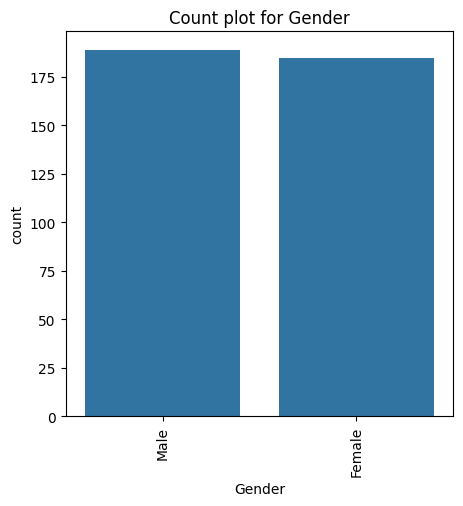

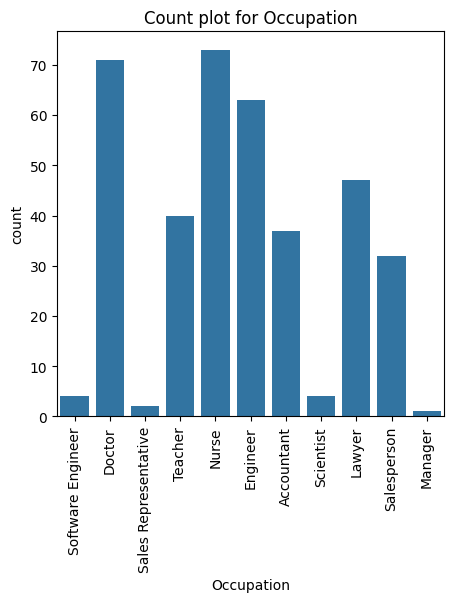

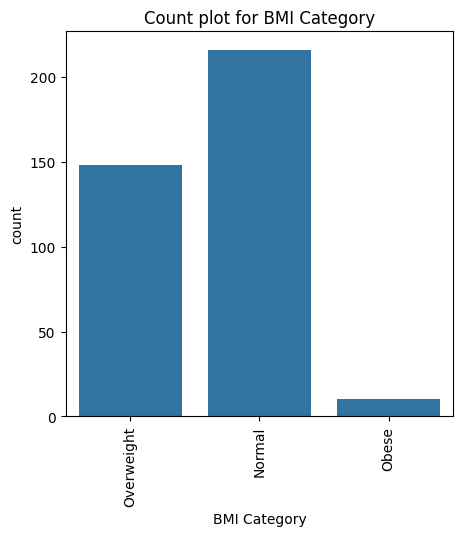

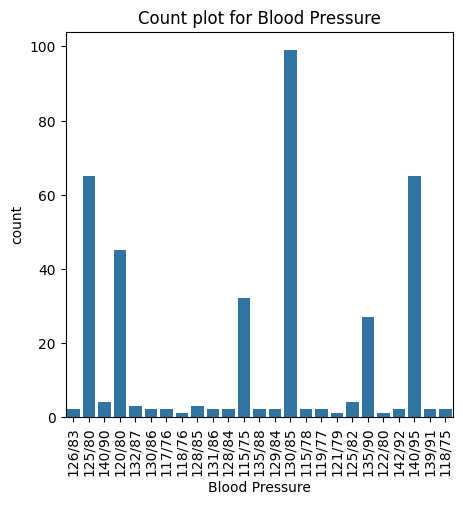

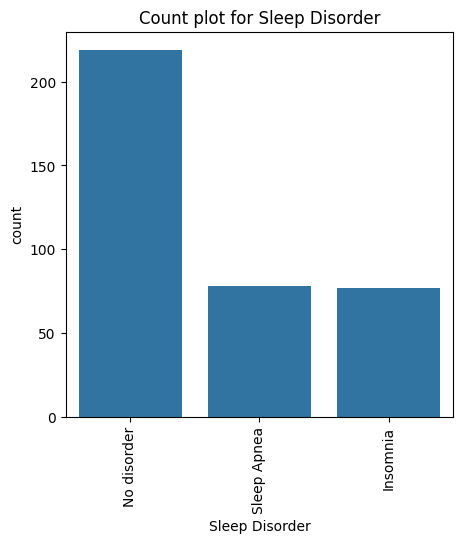

In [7]:
#data visualization
ds.visualizations.countplot(sleep_df)

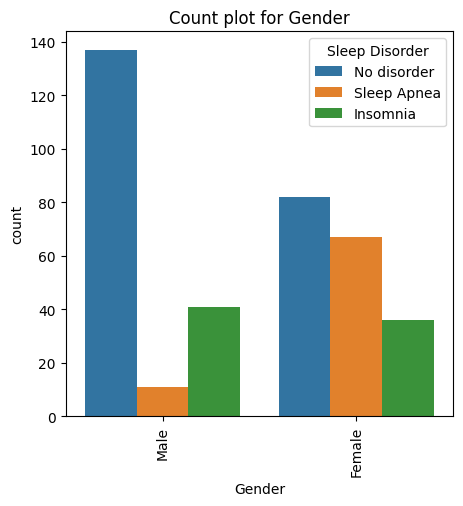

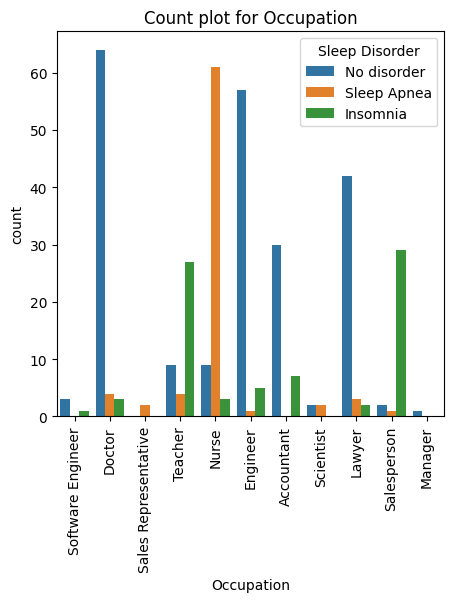

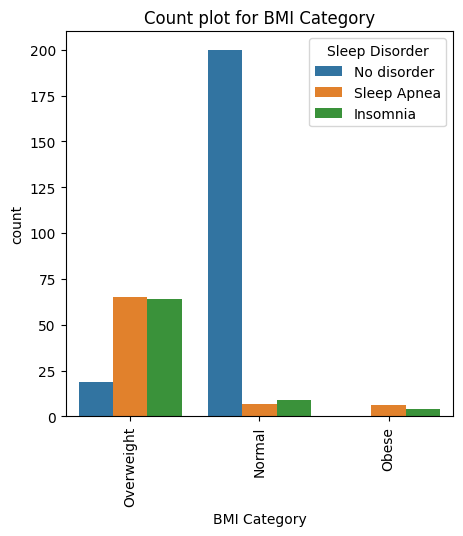

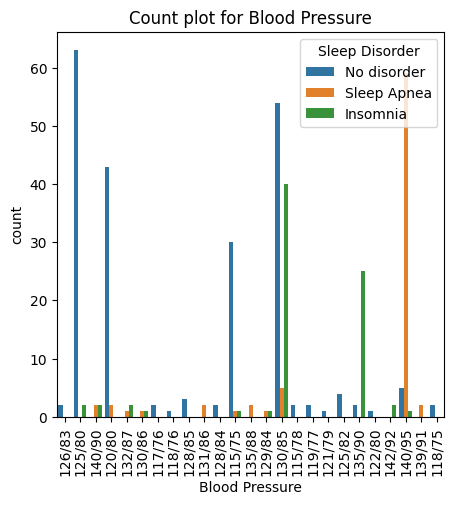

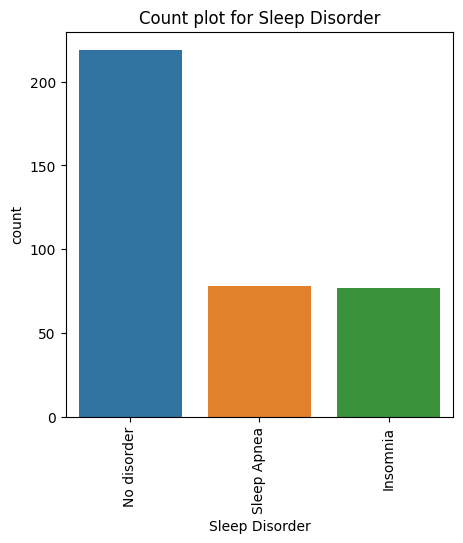

In [8]:
#data visualization
ds.visualizations.countplot(sleep_df, separate_by='Sleep Disorder')

#### Feature Engineering

Feature Engineering is the process of using domain knowledge to select and transform feature from raw data before building a predictive model using machine learning.

In [9]:
#handling missing values where necessary
sleep_df=ds.feature_engineering.fill_missing_cats(sleep_df)
sleep_df=ds.feature_engineering.fill_missing_num(sleep_df)

In [10]:
#drop none relevant column
sleep_df = sleep_df.drop(['Person ID'], axis=1)
sleep_df.head(2)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No disorder,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder,125,80


In [11]:
sleep_df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'Systolic', 'Diastolic'],
      dtype='object')

In [12]:
sleep_df = sleep_df[['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Heart Rate', 'Daily Steps', 'Sleep Disorder','Systolic', 'Diastolic']]

sleep_df.head(2)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No disorder,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No disorder,125,80


In [ ]:
#sleep_df = pd.get_dummies(sleep_df, drop_first=True)

In [13]:
#import libraries
import matplotlib as mpl
from pycaret.classification import *
mpl.rcParams['figure.dpi'] = 300

In [14]:
clf = setup(data=sleep_df, target="Sleep Disorder",
            train_size=0.8, session_id=38, normalize=True)

,Description,Value
0,Session id,38
1,Target,Sleep Disorder
2,Target type,Multiclass
3,Target mapping,"Insomnia: 0, No disorder: 1, Sleep Apnea: 2"
4,Original data shape,"(374, 13)"
5,Transformed data shape,"(374, 25)"
6,Transformed train set shape,"(299, 25)"
7,Transformed test set shape,"(75, 25)"
8,Ordinal features,1
9,Numeric features,9


In [15]:
#compare best models

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9164,0.9316,0.9164,0.9202,0.9152,0.8512,0.8541,1.0110
dt,Decision Tree Classifier,0.9098,0.9332,0.9098,0.9174,0.9095,0.8416,0.8455,0.0890
lightgbm,Light Gradient Boosting Machine,0.9097,0.9371,0.9097,0.9174,0.9091,0.8410,0.8447,0.2210
et,Extra Trees Classifier,0.9064,0.9370,0.9064,0.9134,0.9059,0.8355,0.8394,0.2190
gbc,Gradient Boosting Classifier,0.8998,0.9354,0.8998,0.9057,0.8987,0.8229,0.8266,0.3200
rf,Random Forest Classifier,0.8997,0.9423,0.8997,0.9084,0.8991,0.8235,0.8280,0.2260
ridge,Ridge Classifier,0.8929,0.0000,0.8929,0.8991,0.8924,0.8121,0.8154,0.0860
lda,Linear Discriminant Analysis,0.8929,0.9296,0.8929,0.8991,0.8924,0.8121,0.8154,0.0900
knn,K Neighbors Classifier,0.8830,0.9315,0.8830,0.8870,0.8819,0.7930,0.7966,0.1090
svm,SVM - Linear Kernel,0.8794,0.0000,0.8794,0.8838,0.8763,0.7839,0.7894,0.0920


In [16]:
model = create_model('lr', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.8982,0.8333,0.8373,0.8333,0.7154,0.7167
1,0.9333,0.9365,0.9333,0.9404,0.9324,0.8812,0.8875
2,0.9667,0.9653,0.9667,0.9714,0.9664,0.9405,0.9423
3,0.9667,0.9667,0.9667,0.9714,0.9675,0.9419,0.9439
4,0.8000,0.8535,0.8000,0.7933,0.7902,0.6250,0.6313
5,0.9333,0.9410,0.9333,0.9398,0.9284,0.8780,0.8839
6,0.8667,0.9000,0.8667,0.8667,0.8667,0.7619,0.7619
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9333,0.9258,0.9333,0.9333,0.9333,0.8859,0.8859


In [17]:
#evaluate model
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [18]:
predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8667,0.8958,0.8667,0.8719,0.8666,0.7639,0.7657


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic,Diastolic,Sleep Disorder,prediction_label,prediction_score
285,Female,50,Nurse,6.0,6,90,8,Overweight,75,10000,140,95,Sleep Apnea,Sleep Apnea,0.8897
206,Male,43,Engineer,7.7,8,90,5,Normal,70,8000,130,85,No disorder,No disorder,0.8306
33,Male,31,Doctor,6.1,6,30,8,Normal,72,5000,125,80,No disorder,No disorder,0.9426
149,Female,39,Accountant,8.0,9,80,3,Normal,67,7500,115,78,No disorder,No disorder,0.9763
325,Female,53,Engineer,8.5,9,30,3,Normal,65,5000,125,80,No disorder,No disorder,0.9790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,Female,54,Engineer,8.4,9,30,3,Normal,65,5000,125,80,No disorder,No disorder,0.9799
144,Male,38,Lawyer,7.1,8,60,5,Normal,68,8000,130,85,Sleep Apnea,No disorder,0.9494
16,Female,29,Nurse,6.5,5,40,7,Normal,80,4000,132,87,Sleep Apnea,Sleep Apnea,0.7437
18,Female,29,Nurse,6.5,5,40,7,Normal,80,4000,132,87,Insomnia,Sleep Apnea,0.7437


In [19]:
#save the model
final_model = finalize_model(model)
save_model(final_model, "sleep_lifestyle")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Sleep Duration',
                                              'Quality of Sleep',
                                              'Physical Activity Level',
                                              'Stress Level', 'Heart Rate',
                                              'Daily Steps', 'Systolic',
                                              'Diastolic'],
                                     transformer=Si...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('actual_estimator',
